In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
accepted_rides = pd.read_csv('AcceptedRides.csv')
drivers = pd.read_csv('Drivers.csv')
rides = pd.read_csv('Rides.csv')

In [21]:
accepted_rides

,ride_id,driver_id,ride_distance,ride_duration
0,10,10,63,38
1,13,10,73,96
2,7,8,100,28
3,17,7,119,68
4,20,1,121,92
5,5,7,42,101
6,2,4,6,38
7,11,8,37,43
8,15,8,108,82
9,12,8,38,34


In [22]:
drivers

,driver_id,join_date
0,10,12/10/19
1,8,1/13/20
2,5,2/16/20
3,7,3/8/20
4,4,5/17/20
5,1,10/24/20
6,6,1/5/21


In [23]:
rides

,ride_id,user_id,requested_at
0,6,75,12/9/19
1,1,54,2/9/20
2,10,63,3/4/20
3,19,39,4/6/20
4,3,41,6/3/20
5,13,52,6/22/20
6,7,69,7/16/20
7,17,70,8/25/20
8,20,81,11/2/20
9,5,57,11/9/20


In [24]:
frame = pd.DataFrame({'month':range(1,13)})

drivers['join_date'] = pd.to_datetime(drivers['join_date'])
drivers = drivers.query("join_date.dt.year <= 2020")
drivers['month'] = np.where(drivers['join_date'].dt.year < 2020, 1, drivers['join_date'].dt.month)
drivers = drivers.groupby(['month'], as_index = False).driver_id.nunique()
drivers

/Users/zw/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,month,driver_id
0,1,2
1,2,1
2,3,1
3,5,1
4,10,1


In [25]:
rides['requested_at'] = pd.to_datetime(rides['requested_at'])
rides = rides.query('requested_at.dt.year == 2020')
rides['month'] = rides['requested_at'].dt.month

rides_accept = pd.merge(rides,accepted_rides, on = 'ride_id')
rides_accept = rides_accept.groupby(['month'], as_index = False).driver_id.nunique()
rides_accept

/Users/zw/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,month,driver_id
0,3,1
1,6,1
2,7,1
3,8,1
4,11,2
5,12,1


In [32]:
summary = pd.merge(frame,drivers, on = 'month', how = 'left').merge(rides_accept,on = 'month', how = 'left').fillna(0)
summary['cumsum'] = summary['driver_id_x'].cumsum()
summary['working_percentage'] = round(100 * summary['driver_id_y']/summary['cumsum'],2).fillna(0)
summary[['month','working_percentage']]

,month,driver_id_x,driver_id_y,cumsum,working_percentage
0,1,2.0,0.0,2.0,0.00
1,2,1.0,0.0,3.0,0.00
2,3,1.0,1.0,4.0,25.00
3,4,0.0,0.0,4.0,0.00
4,5,1.0,0.0,5.0,0.00
5,6,0.0,1.0,5.0,20.00
6,7,0.0,1.0,5.0,20.00
7,8,0.0,1.0,5.0,20.00
8,9,0.0,0.0,5.0,0.00
9,10,1.0,0.0,6.0,0.00


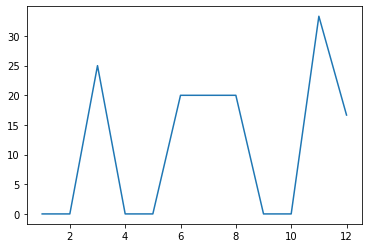

In [33]:
plt.figure()
plt.plot(summary['month'], summary['working_percentage'])
plt.show()